In [1]:
# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np

# Import Scikit-Learn library for the classification models
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import classification_report

# Another statistic model library
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 20})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Import cleaning and splitting functions
from clean_split_data import clean_data
from clean_split_data import split_data

### Data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data = clean_data(data)
X_train, X_test, y_train, y_test = split_data(data)

### Classifier

In [4]:
clf = SVC(kernel='rbf', C=10000)
clf.fit(X_train, y_train)

SVC(C=10000)

### SVM rbf Prediction with all 10 parameters

In [5]:
def predict(test_data):
    
    #test_data = pd.DataFrame(test_data).T
    y_pred = clf.predict(test_data)
   
    return y_pred

In [6]:
y_pred = predict(X_test)

In [7]:
'''Accuracy and MSE Using ALL 10 features'''

accuracy_1 = accuracy_score(y_test, y_pred)
print("Prediction accuracy MSE: ", mean_squared_error(y_test, y_pred))
print("Accuracy score", accuracy_score(y_test, y_pred))
#print('R-Squared Score',r2_score(y_test,y_pred))

Prediction accuracy MSE:  0.07017543859649122
Accuracy score 0.9298245614035088


### Backward Stepwise selection (MSE and AC Using 1 to 9 features)

In [8]:
'''Load the cleaned original dataset for below use'''
X = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y = data.diagnosis

'''A list of for the for-loop'''
n = [1,2,3,4,5,6,7,8,9]

list_MSE=[]
list_AC=[]
list_MSE_1=[]
list_AC_1=[]
selected_features = []
#list_R2=[]
#list_R2_1=[]

for i in n:
    '''Only passing the training data set into the Feature Selector'''
    '''Any preprocessing method should not be fitted on the whole dataset to prevent carrying information from the train set
       to test set'''
    sbs_backward = SequentialFeatureSelector(SVC(kernel = "rbf"), 
                                        n_features_to_select=i,
                                        direction='backward').fit(X_train, y_train)
    selected = sbs_backward.get_support(indices=True)
    
    '''passing the selected features to the orginial dataset for each number of i'''
    f_names = np.array(X.columns)
    x_manip = X[f_names[selected]]
    selected_features.append(f_names[selected])
    #print("Selected input features using backward Stepwise Selection", f_names[selected])
    #print(x_manip)
    
    '''Spliting the original data set with selected feature for each number of i'''
    X_train1, X_test1, y_train1, y_test1 = train_test_split(x_manip, y , test_size=0.3, random_state=16) 
    
    model = SVC(kernel='rbf', C=10000)
    model.fit(X_train1, y_train1)

    y_pred1 = model.predict(X_test1)
    y_pred2 = model.predict(X_train1)
    
    list_AC.append(accuracy_score(y_test1, y_pred1))
    list_AC_1.append(accuracy_score(y_train1, y_pred2))
    list_MSE.append(mean_squared_error(y_test1, y_pred1))
    list_MSE_1.append(mean_squared_error(y_train1, y_pred2))
    
    #print("Prediction accuracy MSE: ", mean_squared_error(y_test1, y_pred1))
    #print('R-Squared Score',r2_score(y_test1,y_pred1))
    #print("Accuracy score", accuracy_score(y_test1, y_pred1))   
    #list_R2.append(r2_score(y_test1, y_pred1))
    #print('MSE:', list_MSE)
    #print('R2:', list_R2)
    #print('AC:', list_AC)
    #list_R2_1.append(r2_score(y_train1, y_pred2))

<function matplotlib.pyplot.show(close=None, block=None)>

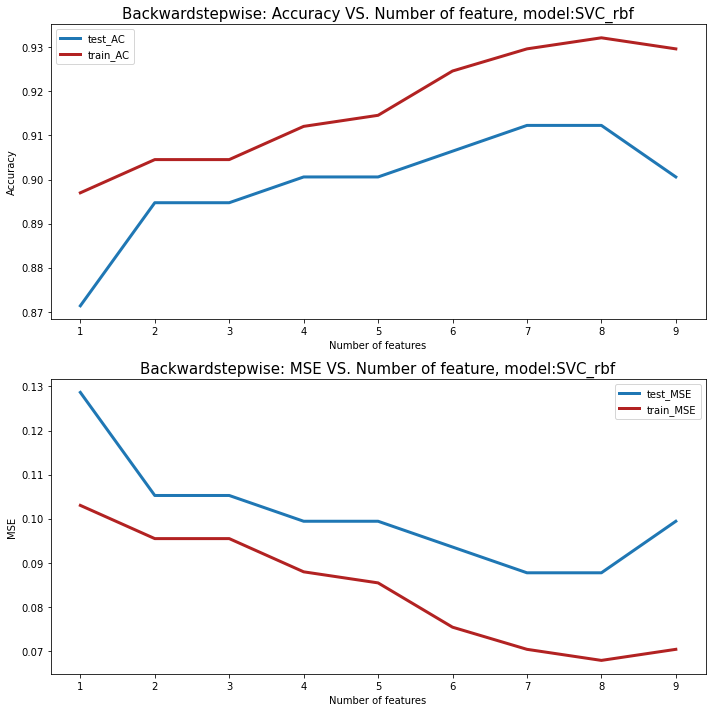

In [9]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
#ax[0].plot(n, list_R2, linewidth=3, alpha=1,label='test_R2')
#ax[0].plot(n, list_R2_1, linewidth=3, alpha=1,c='FireBrick',label='train_R2')
#ax[0].set_title('Backwardstepwise: R2 VS. Number of feature, model:SVC_rbf', fontsize=15)
#ax[0].set_xlabel('Number of features')
#ax[0].set_ylabel('R2')
#ax[0].legend()

ax[0].plot(n, list_AC, linewidth=3 ,alpha=1,label='test_AC')
ax[0].plot(n, list_AC_1, linewidth=3, alpha=1,c='FireBrick',label='train_AC')
ax[0].set_title('Backwardstepwise: Accuracy VS. Number of feature, model:SVC_rbf', fontsize=15)
ax[0].set_xlabel('Number of features')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(n, list_MSE, linewidth=3 ,alpha=1,label='test_MSE')
ax[1].plot(n, list_MSE_1, linewidth=3, alpha=1,c='FireBrick',label='train_MSE')
ax[1].set_title('Backwardstepwise: MSE VS. Number of feature, model:SVC_rbf', fontsize=15)
ax[1].set_xlabel('Number of features')
ax[1].set_ylabel('MSE')
ax[1].legend()

plt.tight_layout()
plt.show

In [10]:
'''If Testing Line is above training line, indicates the presence of high bias in dataset, causing underfitting'''

'If Testing Line is above training line, indicates the presence of high bias in dataset, causing underfitting'

### Forward Stepwise (Not recommend because of suppressor effects, just for demonstration)

In [11]:
n = [1,2,3,4,5,6,7,8,9]

list_MSE1=[]
list_R21=[]
list_AC1=[]

for i in n:
    sfs_forward = SequentialFeatureSelector(SVC(kernel = "rbf"), 
                                            n_features_to_select=i,
                                            direction='forward').fit(X_train, y_train)
    selected = sfs_forward.get_support(indices=True)
    f_names = np.array(X.columns)
    x_manip1 = X[f_names[selected]]
    X_train2, X_test2, y_train2, y_test2 = train_test_split(x_manip1, y, test_size=0.3, random_state=16)
    
    model = SVC(kernel='rbf', C=10000)
    model.fit(X_train2, y_train2)

    y_pred3 = model.predict(X_test2)
    #print("Prediction accuracy MSE: ", mean_squared_error(y_test1, y_pred1))
    #print('R-Squared Score',r2_score(y_test1,y_pred1))
    #print("Accuracy score", accuracy_score(y_test1, y_pred1))
    
    list_MSE1.append(mean_squared_error(y_test2, y_pred3))
    list_AC1.append(accuracy_score(y_test2, y_pred3))
    #list_R21.append(r2_score(y_test2, y_pred3))
    #print('MSE:', list_MSE)
    #print('R2:', list_R2)
    #print('AC:', list_AC)

<function matplotlib.pyplot.show(close=None, block=None)>

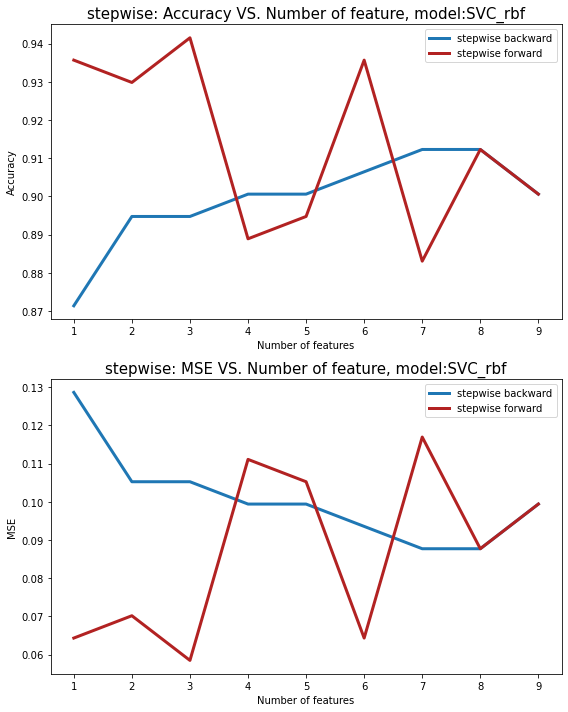

In [12]:
fig,ax = plt.subplots(2,1,figsize=(8,10))

#ax[0].plot(n, list_R2, linewidth=3, alpha=1,label='stepwise backward')
#ax[0].plot(n, list_R21, linewidth=3, alpha=1,c='FireBrick',label='stepwise forward')
#ax[0].set_title('stepwise: R2 VS. Number of feature, model:SVC_rbf', fontsize=15)
#ax[0].set_xlabel('Number of features')
#ax[0].set_ylabel('R2')
#ax[0].legend()

ax[0].plot(n, list_AC, linewidth=3 ,alpha=1,label='stepwise backward')
ax[0].plot(n, list_AC1, linewidth=3, alpha=1,c='FireBrick',label='stepwise forward')
ax[0].set_title('stepwise: Accuracy VS. Number of feature, model:SVC_rbf', fontsize=15)
ax[0].set_xlabel('Number of features')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(n, list_MSE, linewidth=3 ,alpha=1,label='stepwise backward')
ax[1].plot(n, list_MSE1, linewidth=3, alpha=1,c='FireBrick',label='stepwise forward')
ax[1].set_title('stepwise: MSE VS. Number of feature, model:SVC_rbf', fontsize=15)
ax[1].set_xlabel('Number of features')
ax[1].set_ylabel('MSE')
ax[1].legend()

plt.tight_layout()
plt.show

**Based on the graph, you can see that forward stepwise feature selector has a very unstable trend as the number of feature changes**

### Sample Train, Test, Split results

In [13]:
def sample_results():
    ''' 
    Returns the results and confusion matrix of the sample dataset from Breast Cancer Wisconsin Dataset.
    '''
    y_pred = clf.predict(X_test)
    print("Prediction accuracy MSE: ", mean_squared_error(y_test, y_pred))
    print("Mean accuracy on test set", clf.score(X_test, y_test))
    print("The confusion matrix for the sample dataset using a decision tree is displayed below: ")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()
    
    return

Prediction accuracy MSE:  0.07017543859649122
Mean accuracy on test set 0.9298245614035088
The confusion matrix for the sample dataset using a decision tree is displayed below: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



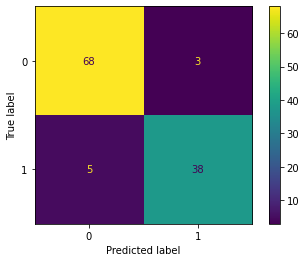

In [14]:
'''This matrix is only for Non-stepwise SVM only'''
sample_results()

Prediction accuracy MSE:  0.09941520467836257
Mean accuracy on test set 0.9005847953216374
The confusion matrix for the sample dataset using a decision tree is displayed below: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.86      0.88      0.87        65

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.90      0.90      0.90       171



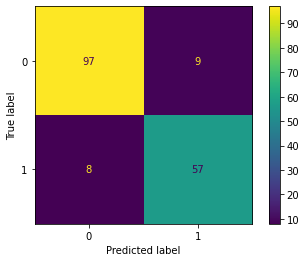

In [15]:
'''This matrix is for Backward Stepwise SVM with 9 features'''
plot_confusion_matrix(model, X_test1, y_test1)
print("Prediction accuracy MSE: ", mean_squared_error(y_test1, y_pred1))
print("Mean accuracy on test set", model.score(X_test1, y_test1))
print("The confusion matrix for the sample dataset using a decision tree is displayed below: ")
print(classification_report(y_test1, y_pred1))

plt.show()

In [16]:
print(list_AC)
print(list_MSE)

[0.8713450292397661, 0.8947368421052632, 0.8947368421052632, 0.9005847953216374, 0.9005847953216374, 0.9064327485380117, 0.9122807017543859, 0.9122807017543859, 0.9005847953216374]
[0.1286549707602339, 0.10526315789473684, 0.10526315789473684, 0.09941520467836257, 0.09941520467836257, 0.0935672514619883, 0.08771929824561403, 0.08771929824561403, 0.09941520467836257]


**Based on the above informaiton,  the Best number of parameters for SVM_rbf is 10**

###  Optimized SVM_rbf Predictor ###

In [21]:
selected_features[7]

array(['texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean'], dtype=object)

In [18]:
def feature_names():
    '''
    Returns array of input features of best performing backwards stepwise selection test.
    '''
    
    return ['radius_mean', 
            'texture_mean', 
            'perimeter_mean', 
            'smoothness_mean',
            'compactness_mean', 
            'concavity_mean', 
            'concave points_mean',
            'symmetry_mean', 
            'fractal_dimension_mean']

In [20]:
def predict(test_data):
    '''
    Takes test data and uses classifier to predict boolean output.
    '''
    X = data[feature_names()]
    y = data.diagnosis
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = SVC(kernel='rbf', C=10000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(test_data)
    
    return y_pred